Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.  
The objective is to predict the value of prices of the house using the given features.


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
train_df = pd.read_csv('train.csv')

In [25]:
correlation_matrix = train_df.corr()

In [26]:
print(correlation_matrix)

             crim        zn     indus      chas  ...   ptratio     black     lstat      medv
crim     1.000000 -0.210913  0.422228 -0.041195  ...  0.313409 -0.475796  0.532077 -0.407454
zn      -0.210913  1.000000 -0.518679 -0.024442  ... -0.380449  0.168130 -0.388112  0.344842
indus    0.422228 -0.518679  1.000000  0.037496  ...  0.391087 -0.335049  0.614155 -0.473932
chas    -0.041195 -0.024442  0.037496  1.000000  ... -0.125067  0.062029 -0.050055  0.204390
nox      0.463001 -0.501990  0.750087  0.080275  ...  0.192513 -0.369416  0.598874 -0.413054
rm      -0.310180  0.328197 -0.440365  0.112251  ... -0.366927  0.155202 -0.615747  0.689598
age      0.379034 -0.544513  0.638378  0.068286  ...  0.259293 -0.268054  0.588834 -0.358888
dis     -0.397067  0.637142 -0.702327 -0.081834  ... -0.231101  0.284374 -0.505939  0.249422
rad      0.666636 -0.303663  0.569779  0.007714  ...  0.470849 -0.406405  0.484568 -0.352251
tax      0.617081 -0.311180  0.708313 -0.021826  ...  0.467437 -0.4064

In [3]:
train_df.drop("ID", axis=1, inplace=True)

In [4]:
x = train_df.drop("medv", axis=1)
y = train_df["medv"]

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
model = LinearRegression()

In [7]:
model.fit(x_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(x_val)

In [9]:
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

In [11]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 23.486735195426004
R-squared: 0.7390315860425418


In [12]:
test_df = pd.read_csv('test.csv')

In [13]:
test_ids = test_df["ID"]
test_df = test_df.drop("ID", axis=1)

In [14]:
test_predictions = model.predict(test_df)

In [15]:
submission_df = pd.DataFrame({"ID": test_ids, "medv": test_predictions})

In [16]:
submission_df.to_csv("submission.csv", index=False)

In [18]:
print(submission_df.head(10))

   ID       medv
0   3  29.873435
1   6  24.983559
2   8  16.852317
3   9   7.893257
4  10  16.463033
5  18  16.583634
6  20  18.873183
7  25  15.011519
8  26  13.093437
9  27  14.990622


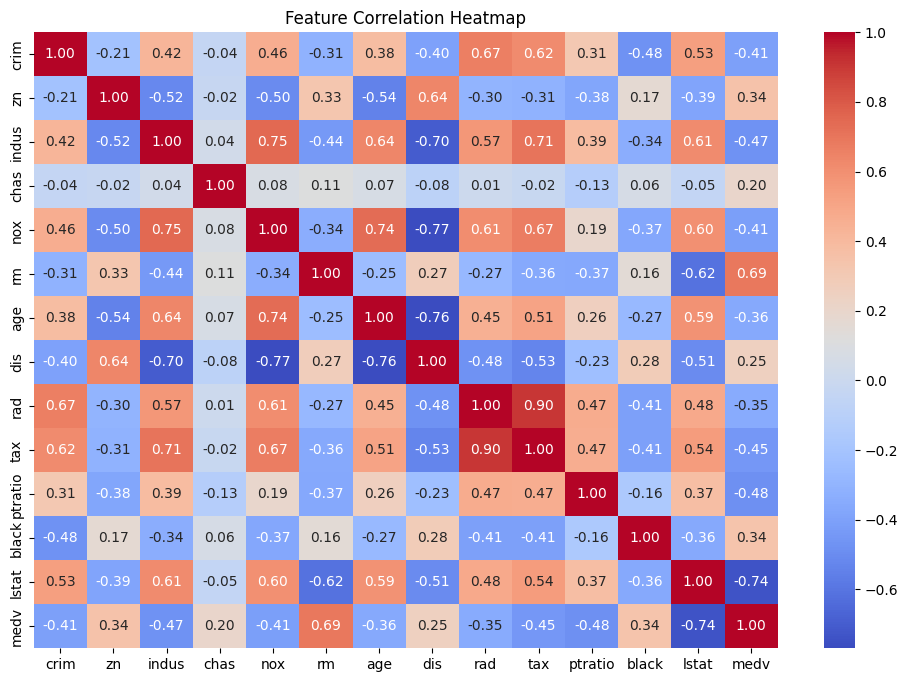

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

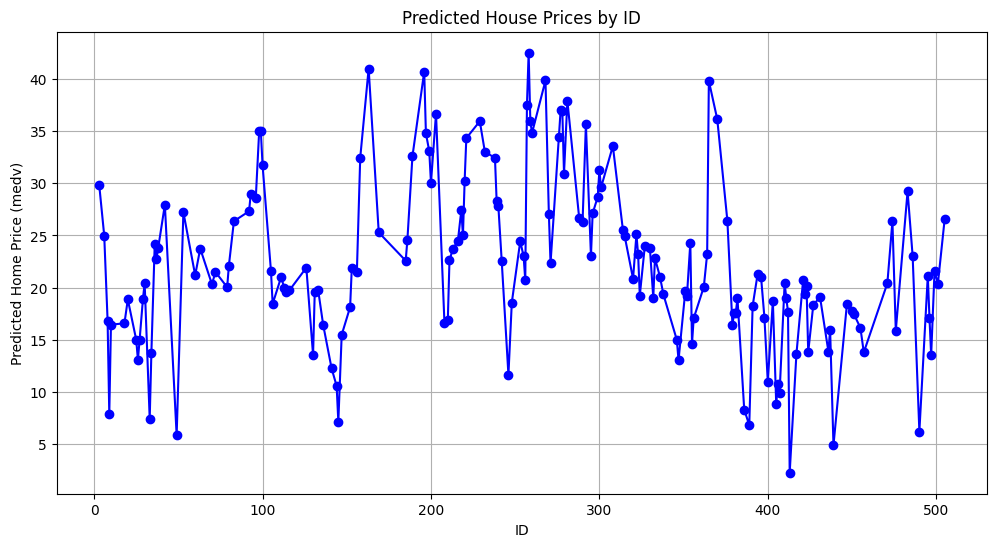

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(submission_df["ID"], submission_df["medv"], marker='o', linestyle='-', color='blue')
plt.title("Predicted House Prices by ID")
plt.xlabel("ID")
plt.ylabel("Predicted Home Price (medv)")
plt.grid(True)
plt.show()